<img src="./images/banner.png" width="800">

# Grouping and Aggregating Data

**Grouping and aggregating** are fundamental operations in data analysis that allow you to summarize and extract insights from your data. These techniques are particularly powerful when working with large datasets, enabling you to uncover patterns, trends, and statistics within different subsets of your data.


In Pandas, grouping refers to the process of splitting the data into groups based on some criteria. Aggregating involves computing a summary statistic (or statistics) about each group. Together, these operations allow you to answer questions like:

- What is the average sale price for each product category?
- How many sales were made in each region?
- What is the total revenue per quarter?


The primary method for grouping in Pandas is the `groupby()` function. It creates a `GroupBy` object, which can then be used with various aggregation functions to compute results.


Key concepts we'll cover in this lecture include:

- Using `groupby()` to create groups
- Applying aggregation functions to grouped data
- Working with multiple grouping columns
- Performing custom aggregations
- Handling time series and categorical data in groups
- Advanced grouping techniques and transformations


Let's start by importing the necessary libraries and creating a sample dataset of sales data to work with throughout this lecture:


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a sample DataFrame of sales data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones']
regions = ['North', 'South', 'East', 'West']

In [3]:
df = pd.DataFrame({
    'Date': np.random.choice(dates, 1000),
    'Product': np.random.choice(products, 1000),
    'Region': np.random.choice(regions, 1000),
    'Sales': np.random.randint(100, 1500, 1000),
    'Units': np.random.randint(1, 10, 1000)
})
df

,Date,Product,Region,Sales,Units
0,2023-06-22,Headphones,West,613,8
1,2023-02-17,Laptop,North,467,7
2,2023-04-28,Laptop,North,1315,7
3,2023-07-12,Laptop,East,1317,7
4,2023-11-20,Smartphone,North,1401,1
...,...,...,...,...,...
995,2023-07-03,Laptop,North,1282,1
996,2023-04-24,Laptop,East,333,7
997,2023-07-25,Headphones,North,1224,4
998,2023-11-08,Headphones,East,960,3


In [4]:
df['Revenue'] = df['Sales'] * df['Units']
df = df.sort_values('Date').reset_index(drop=True)
df

,Date,Product,Region,Sales,Units,Revenue
0,2023-01-01,Tablet,North,102,6,612
1,2023-01-01,Laptop,West,1051,9,9459
2,2023-01-01,Laptop,North,1235,4,4940
3,2023-01-01,Laptop,East,1238,1,1238
4,2023-01-03,Laptop,East,194,1,194
...,...,...,...,...,...,...
995,2023-12-30,Headphones,East,573,6,3438
996,2023-12-30,Smartphone,East,896,2,1792
997,2023-12-30,Smartphone,West,362,3,1086
998,2023-12-31,Laptop,South,283,1,283


In [5]:
df.head(10)

,Date,Product,Region,Sales,Units,Revenue
0,2023-01-01,Tablet,North,102,6,612
1,2023-01-01,Laptop,West,1051,9,9459
2,2023-01-01,Laptop,North,1235,4,4940
3,2023-01-01,Laptop,East,1238,1,1238
4,2023-01-03,Laptop,East,194,1,194
5,2023-01-03,Tablet,West,703,3,2109
6,2023-01-04,Laptop,North,677,6,4062
7,2023-01-04,Tablet,West,497,9,4473
8,2023-01-04,Laptop,East,523,9,4707
9,2023-01-04,Tablet,South,475,6,2850


This DataFrame contains:
- A 'Date' column representing the sale date
- A 'Product' column with different product categories
- A 'Region' column indicating where the sale occurred
- A 'Sales' column with the price per unit
- A 'Units' column showing the number of units sold
- A 'Revenue' column calculated as Sales * Units


We'll use this dataset to demonstrate various grouping and aggregation techniques throughout the lecture. This data represents a year's worth of sales information for an electronics retailer across different products and regions.


By working with this meaningful dataset, you'll see how grouping and aggregating can provide valuable insights such as:

- Total revenue by product category
- Average sales price in each region
- Monthly sales trends
- Best-selling products by units sold


By the end of this session, you'll have a solid understanding of how to use these powerful tools to analyze and summarize your data effectively, extracting business-relevant insights from raw sales data.

**Table of contents**<a id='toc0_'></a>    
- [Basic Grouping with `groupby()`](#toc1_)    
  - [Grouping by a Single Column](#toc1_1_)    
  - [Grouping by Multiple Columns](#toc1_2_)    
  - [Grouping with a Custom Function](#toc1_3_)    
- [Aggregation Methods](#toc2_)    
  - [Built-in Aggregation Functions](#toc2_1_)    
  - [Custom Aggregation Functions](#toc2_2_)    
  - [Multiple Aggregations](#toc2_3_)    
- [Advanced Grouping Techniques](#toc3_)    
  - [Using get_group()](#toc3_1_)    
  - [Filtering Groups](#toc3_2_)    
- [Transformation and Applying Functions to Groups](#toc4_)    
  - [Using `transform()`](#toc4_1_)    
  - [Using `apply()`](#toc4_2_)    
- [Practical Examples and Use Cases](#toc5_)    
  - [Sales Performance Analysis](#toc5_1_)    
  - [Customer Segmentation](#toc5_2_)    
  - [Product Affinity Analysis](#toc5_3_)    
  - [Seasonal Trends Analysis](#toc5_4_)    
  - [Sales Team Performance Analysis](#toc5_5_)    
  - [Cohort Analysis](#toc5_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Basic Grouping with `groupby()`](#toc0_)

The `groupby()` function is the foundation of grouping operations in Pandas. It allows you to split your data into groups based on one or more columns, or even custom functions.


### <a id='toc1_1_'></a>[Grouping by a Single Column](#toc0_)


Let's start by grouping our sales data by product to see total revenue for each product category:


In [6]:
# Group by Product and sum the Revenue
product_revenue = df.groupby('Product')['Revenue'].sum()

product_revenue

Product
Headphones    1119087
Laptop        1055232
Smartphone    1135676
Tablet         805445
Name: Revenue, dtype: int64

This gives us a Series with the total revenue for each product. We can also use multiple aggregation functions:


In [7]:
# Multiple aggregations
product_summary = df.groupby('Product').agg({
    'Revenue': 'sum',
    'Units': 'sum',
    'Sales': 'mean'
})

product_summary

,Revenue,Units,Sales
Product,,,
Headphones,1119087,1373,789.369231
Laptop,1055232,1303,810.361868
Smartphone,1135676,1355,814.746094
Tablet,805445,1068,763.612335


### <a id='toc1_2_'></a>[Grouping by Multiple Columns](#toc0_)


We can group by multiple columns to get more detailed insights:


In [8]:
# Group by Product and Region
roduct_region_sales = df.groupby(['Product', 'Region'])['Revenue'].sum()
roduct_region_sales

Product     Region
Headphones  East      339165
            North     219987
            South     214237
            West      345698
Laptop      East      258699
            North     242457
            South     318475
            West      235601
Smartphone  East      300088
            North     275026
            South     336204
            West      224358
Tablet      East      175186
            North     188136
            South     227453
            West      214670
Name: Revenue, dtype: int64

This creates a hierarchical index. To make it easier to work with, we can use the `unstack()` method:


In [9]:
roduct_region_sales.unstack(level='Region')

Region,East,North,South,West
Product,,,,
Headphones,339165,219987,214237,345698
Laptop,258699,242457,318475,235601
Smartphone,300088,275026,336204,224358
Tablet,175186,188136,227453,214670


### <a id='toc1_3_'></a>[Grouping with a Custom Function](#toc0_)


Sometimes, we need to group by a criterion that's not directly available in our columns. We can use a custom function for this:


In [10]:
# Custom function to group by quarter
def get_quarter(date):
    return f'Q{date.quarter}'

In [11]:
# Group by quarter
quarterly_revenue = df.groupby(df['Date'].apply(get_quarter))['Revenue'].sum()

quarterly_revenue

Date
Q1     988223
Q2    1173587
Q3     938852
Q4    1014778
Name: Revenue, dtype: int64

We can also use lambda functions for simple operations:


In [12]:
# Group by month
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()

monthly_revenue

Date
2023-01    271227
2023-02    353486
2023-03    363510
2023-04    441359
2023-05    371862
2023-06    360366
2023-07    332699
2023-08    292041
2023-09    314112
2023-10    336301
2023-11    299121
2023-12    379356
Freq: M, Name: Revenue, dtype: int64

Here's an example combining custom grouping with multiple columns:


In [13]:
# Group by quarter and product
quarter_product_revenue = df.groupby([df['Date'].apply(get_quarter), 'Product'])['Revenue'].sum().unstack()

quarter_product_revenue

Product,Headphones,Laptop,Smartphone,Tablet
Date,,,,
Q1,277670,271099,264338,175116
Q2,289153,321356,352141,210937
Q3,254339,215515,293220,175778
Q4,297925,247262,225977,243614


These grouping techniques allow you to slice and dice your data in various ways, providing different perspectives on your dataset. Remember that after grouping, you typically need to apply some aggregation function (like `sum()`, `mean()`, `count()`, etc.) to get meaningful results.


The `groupby()` function is incredibly flexible, allowing you to group by:
- A single column
- Multiple columns
- A mix of columns and computed values
- Custom functions


This flexibility makes it a powerful tool for data analysis, enabling you to explore your data from multiple angles and uncover insights that might not be immediately apparent in the raw data.

## <a id='toc2_'></a>[Aggregation Methods](#toc0_)

After grouping data, we typically want to compute summary statistics for each group. Pandas provides a variety of methods for aggregating grouped data.


### <a id='toc2_1_'></a>[Built-in Aggregation Functions](#toc0_)


Pandas offers many built-in aggregation functions that can be applied directly to grouped data:


In [14]:
df

,Date,Product,Region,Sales,Units,Revenue
0,2023-01-01,Tablet,North,102,6,612
1,2023-01-01,Laptop,West,1051,9,9459
2,2023-01-01,Laptop,North,1235,4,4940
3,2023-01-01,Laptop,East,1238,1,1238
4,2023-01-03,Laptop,East,194,1,194
...,...,...,...,...,...,...
995,2023-12-30,Headphones,East,573,6,3438
996,2023-12-30,Smartphone,East,896,2,1792
997,2023-12-30,Smartphone,West,362,3,1086
998,2023-12-31,Laptop,South,283,1,283


In [15]:
# Group by Product
grouped = df.groupby('Product')

# Various built-in aggregations
built_in_aggs = grouped['Revenue'].agg([
    'count',    # Number of sales
    'sum',      # Total revenue
    'mean',     # Average revenue per sale
    'median',   # Median revenue
    'min',      # Minimum revenue
    'max',      # Maximum revenue
    'std'       # Standard deviation of revenue
])

built_in_aggs

,count,sum,mean,median,min,max,std
Product,,,,,,,
Headphones,260,1119087,4304.180769,3498.0,105,13473,3306.421445
Laptop,257,1055232,4105.961089,3420.0,176,13239,3080.226782
Smartphone,256,1135676,4436.234375,3641.5,102,13257,3357.415499
Tablet,227,805445,3548.215859,2790.0,102,13302,2904.353198


You can also use these functions on multiple columns at once:


In [16]:
grouped[['Revenue', 'Units']].agg(['sum', 'mean', 'max'])

Revenue                     Units              
                sum         mean    max   sum      mean max
Product                                                    
Headphones  1119087  4304.180769  13473  1373  5.280769   9
Laptop      1055232  4105.961089  13239  1303  5.070039   9
Smartphone  1135676  4436.234375  13257  1355  5.292969   9
Tablet       805445  3548.215859  13302  1068  4.704846   9

### <a id='toc2_2_'></a>[Custom Aggregation Functions](#toc0_)


For more complex calculations, you can define your own aggregation functions:


In [17]:
def revenue_per_unit(x):
    return x.sum() / df.loc[x.index, 'Units'].sum()

def top_sale(x):
    return x.max()

custom_aggs = grouped.agg({
    'Revenue': ['sum', revenue_per_unit],
    'Units': 'sum',
    'Sales': [top_sale, 'mean']
})

custom_aggs

Revenue                  Units    Sales            
                sum revenue_per_unit   sum top_sale        mean
Product                                                        
Headphones  1119087       815.067007  1373     1497  789.369231
Laptop      1055232       809.848043  1303     1497  810.361868
Smartphone  1135676       838.137269  1355     1496  814.746094
Tablet       805445       754.161985  1068     1496  763.612335

You can also use lambda functions for simple custom aggregations:


In [18]:
lambda_aggs = grouped['Revenue'].agg([
    ('Total', 'sum'),
    ('Average', 'mean'),
    ('Range', lambda x: x.max() - x.min())
])

lambda_aggs

,Total,Average,Range
Product,,,
Headphones,1119087,4304.180769,13368
Laptop,1055232,4105.961089,13063
Smartphone,1135676,4436.234375,13155
Tablet,805445,3548.215859,13200


### <a id='toc2_3_'></a>[Multiple Aggregations](#toc0_)


You can apply different aggregations to different columns in a single operation:


In [19]:
multiple_aggs = df.groupby('Region').agg({
    'Revenue': ['sum', 'mean', 'median'],
    'Units': ['sum', 'mean'],
    'Sales': ['min', 'max']
})

multiple_aggs

Revenue                      Units           Sales      
            sum         mean  median   sum      mean   min   max
Region                                                          
East    1073138  4224.952756  3514.5  1277  5.027559   105  1495
North    925606  3989.681034  3234.0  1177  5.073276   100  1497
South   1096369  4403.088353  3563.0  1287  5.168675   104  1488
West    1020327  3850.290566  2884.0  1358  5.124528   102  1497

For more control over the resulting column names, you can use named aggregations:


In [20]:
named_aggs = df.groupby('Product').agg(
    Total_Revenue=('Revenue', 'sum'),
    Avg_Price=('Sales', 'mean'),
    Total_Units=('Units', 'sum'),
    Max_Single_Sale=('Revenue', 'max')
)

named_aggs

,Total_Revenue,Avg_Price,Total_Units,Max_Single_Sale
Product,,,,
Headphones,1119087,789.369231,1373,13473
Laptop,1055232,810.361868,1303,13239
Smartphone,1135676,814.746094,1355,13257
Tablet,805445,763.612335,1068,13302


You can also combine different types of aggregations:


In [21]:
# todo: explain how x.max() - x.min() is operated vectorized
combined_aggs = df.groupby(['Region', 'Product']).agg({
    'Revenue': ['sum', 'mean'],
    'Units': 'sum',
    'Sales': lambda x: x.max() - x.min()
}).round(2)

combined_aggs

Revenue          Units    Sales
                      sum     mean   sum <lambda>
Region Product                                   
East   Headphones  339165  4522.20   395     1390
       Laptop      258699  4042.17   344     1324
       Smartphone  300088  4763.30   322     1236
       Tablet      175186  3368.96   216     1312
North  Headphones  219987  3928.34   295     1365
       Laptop      242457  3974.70   298     1370
       Smartphone  275026  4825.02   313     1334
       Tablet      188136  3243.72   271     1396
South  Headphones  214237  3967.35   264     1332
       Laptop      318475  4485.56   358     1315
       Smartphone  336204  4872.52   385     1378
       Tablet      227453  4135.51   280     1372
West   Headphones  345698  4609.31   419     1386
       Laptop      235601  3862.31   303     1366
       Smartphone  224358  3348.63   335     1363
       Tablet      214670  3462.42   301     1384

These aggregation methods provide a powerful toolkit for summarizing your grouped data. By combining different aggregation functions, you can create comprehensive summaries that capture various aspects of your data, allowing for deeper insights and analysis.


Remember that the choice of aggregation method depends on the nature of your data and the specific insights you're trying to extract. Always consider the meaning and relevance of each aggregation in the context of your analysis.

## <a id='toc3_'></a>[Advanced Grouping Techniques](#toc0_)

As you become more proficient with grouping and aggregating data, you'll encounter scenarios that require more advanced techniques. Let's explore some of these methods to enhance your data analysis capabilities.


### <a id='toc3_1_'></a>[Using get_group()](#toc0_)


The `get_group()` method allows you to select a specific group from a GroupBy object for further analysis.


In [22]:
# Create a GroupBy object
grouped = df.groupby('Product')
grouped

In [23]:
# Get the group for 'Laptop'
laptop_group = grouped.get_group('Laptop')

laptop_group.head()

,Date,Product,Region,Sales,Units,Revenue
1,2023-01-01,Laptop,West,1051,9,9459
2,2023-01-01,Laptop,North,1235,4,4940
3,2023-01-01,Laptop,East,1238,1,1238
4,2023-01-03,Laptop,East,194,1,194
6,2023-01-04,Laptop,North,677,6,4062


In [24]:
# Calculate statistics for the Laptop group
laptop_stats = laptop_group.agg({
    'Revenue': ['sum', 'mean'],
    'Units': 'sum',
    'Sales': ['min', 'max', 'mean']
})

laptop_stats

,Revenue,Units,Sales
sum,1.055232e+06,1303.0,NaN
mean,4.105961e+03,NaN,810.361868
min,NaN,NaN,105.000000
max,NaN,NaN,1497.000000


### <a id='toc3_2_'></a>[Filtering Groups](#toc0_)


You can filter groups based on some condition, which is useful for focusing on specific subsets of your data.


In [25]:
# Filter groups based on their size
large_groups = grouped.filter(lambda x: len(x) > 200)

large_groups['Product'].value_counts()

Product
Headphones    260
Laptop        257
Smartphone    256
Tablet        227
Name: count, dtype: int64

In [26]:
# Filter groups based on aggregated values
high_revenue_products = grouped.filter(lambda x: x['Revenue'].sum() > 200000)

high_revenue_products['Product'].unique()

array(['Tablet', 'Laptop', 'Headphones', 'Smartphone'], dtype=object)

In [27]:
# Combining filtering with aggregation
filtered_stats = (
    grouped.filter(lambda x: x['Revenue'].mean() > 1000)
    .groupby('Product')
    .agg({
        'Revenue': ['sum', 'mean'],
        'Units': 'sum'
    })
)

filtered_stats

Revenue              Units
                sum         mean   sum
Product                               
Headphones  1119087  4304.180769  1373
Laptop      1055232  4105.961089  1303
Smartphone  1135676  4436.234375  1355
Tablet       805445  3548.215859  1068

Remember that while these methods are powerful, they can also be computationally intensive for very large datasets. Always consider the size of your data and the efficiency of your operations when applying these techniques.

## <a id='toc4_'></a>[Transformation and Applying Functions to Groups](#toc0_)

After grouping data, you often need to perform operations that either transform the data within each group or apply complex functions to each group. Pandas provides two powerful methods for these tasks: `transform()` and `apply()`.


### <a id='toc4_1_'></a>[Using `transform()`](#toc0_)


The `transform()` method applies a function to each group and returns a Series or DataFrame with the same shape as the original, making it useful for creating new columns based on group-wise computations.


Key features of `transform()`:
- Returns a result that has the same shape as the input
- Often used to create new columns based on group-wise calculations
- Can be used with built-in functions or custom functions


Examples:


In [28]:
df

,Date,Product,Region,Sales,Units,Revenue
0,2023-01-01,Tablet,North,102,6,612
1,2023-01-01,Laptop,West,1051,9,9459
2,2023-01-01,Laptop,North,1235,4,4940
3,2023-01-01,Laptop,East,1238,1,1238
4,2023-01-03,Laptop,East,194,1,194
...,...,...,...,...,...,...
995,2023-12-30,Headphones,East,573,6,3438
996,2023-12-30,Smartphone,East,896,2,1792
997,2023-12-30,Smartphone,West,362,3,1086
998,2023-12-31,Laptop,South,283,1,283


In [29]:
# Calculate the percentage of total revenue for each product
df['Revenue_Pct'] = df.groupby('Product')['Revenue'].transform(lambda x: x / x.sum() * 100)

df[['Product', 'Revenue', 'Revenue_Pct']].head(10)

,Product,Revenue,Revenue_Pct
0,Tablet,612,0.075983
1,Laptop,9459,0.896391
2,Laptop,4940,0.468143
3,Laptop,1238,0.117320
4,Laptop,194,0.018385
5,Tablet,2109,0.261843
6,Laptop,4062,0.384939
7,Tablet,4473,0.555345
8,Laptop,4707,0.446063
9,Tablet,2850,0.353842


In [30]:
def lambda_func(x):
    new_s = []
    for item in x:
        new_s.append(item - x.mean())
    return new_s

# Calculate the difference from mean revenue for each region
df['Revenue_Diff_From_Mean'] = df.groupby('Region')['Revenue'].transform(lambda x: x - x.mean())

df[['Region', 'Revenue', 'Revenue_Diff_From_Mean']].head(10)

,Region,Revenue,Revenue_Diff_From_Mean
0,North,612,-3377.681034
1,West,9459,5608.709434
2,North,4940,950.318966
3,East,1238,-2986.952756
4,East,194,-4030.952756
5,West,2109,-1741.290566
6,North,4062,72.318966
7,West,4473,622.709434
8,East,4707,482.047244
9,South,2850,-1553.088353


In [31]:
# Rank sales within each product category
df['Sales_Rank'] = df.groupby('Product')['Sales'].transform('rank', method='dense', ascending=False)

df[['Product', 'Sales', 'Sales_Rank']].sort_values('Sales_Rank').head(10)

,Product,Sales,Sales_Rank
906,Tablet,1496,1.0
187,Laptop,1497,1.0
905,Smartphone,1496,1.0
369,Headphones,1497,1.0
411,Headphones,1495,2.0
815,Tablet,1488,2.0
351,Smartphone,1482,2.0
585,Laptop,1477,2.0
718,Tablet,1486,3.0
106,Headphones,1493,3.0


In [32]:
# Calculate cumulative sum of units sold for each product over time
df['Cumulative_Units'] = df.sort_values('Date').groupby('Product')['Units'].transform('cumsum')

df[['Date', 'Product', 'Units', 'Cumulative_Units']].head(10)

,Date,Product,Units,Cumulative_Units
0,2023-01-01,Tablet,6,6
1,2023-01-01,Laptop,9,9
2,2023-01-01,Laptop,4,13
3,2023-01-01,Laptop,1,14
4,2023-01-03,Laptop,1,15
5,2023-01-03,Tablet,3,9
6,2023-01-04,Laptop,6,21
7,2023-01-04,Tablet,9,18
8,2023-01-04,Laptop,9,30
9,2023-01-04,Tablet,6,24


### <a id='toc4_2_'></a>[Using `apply()`](#toc0_)


In [ ]:
# todo
# clarify this is apply on top of groupby
# no simple apply on dataframe or series object

The `apply()` method is more flexible than `transform()`. It allows you to apply arbitrary functions to each group, potentially returning results with different shapes.


Key features of `apply()`:
- Can return a scalar, Series, or DataFrame for each group
- Useful for more complex operations that can't be done with simple aggregations
- Can change the shape of the results


Examples:


In [33]:
df

,Date,Product,Region,Sales,Units,Revenue,Revenue_Pct,Revenue_Diff_From_Mean,Sales_Rank,Cumulative_Units
0,2023-01-01,Tablet,North,102,6,612,0.075983,-3377.681034,213.0,6
1,2023-01-01,Laptop,West,1051,9,9459,0.896391,5608.709434,74.0,9
2,2023-01-01,Laptop,North,1235,4,4940,0.468143,950.318966,50.0,13
3,2023-01-01,Laptop,East,1238,1,1238,0.117320,-2986.952756,49.0,14
4,2023-01-03,Laptop,East,194,1,194,0.018385,-4030.952756,214.0,15
...,...,...,...,...,...,...,...,...,...,...
995,2023-12-30,Headphones,East,573,6,3438,0.307215,-786.952756,157.0,1373
996,2023-12-30,Smartphone,East,896,2,1792,0.157791,-2432.952756,106.0,1345
997,2023-12-30,Smartphone,West,362,3,1086,0.095626,-2764.290566,196.0,1348
998,2023-12-31,Laptop,South,283,1,283,0.026819,-4120.088353,194.0,1303


In [34]:
# Calculate the top 2 sales days for each product
def top_2_sales_days(group):
    return group.nlargest(2, 'Sales')[['Date', 'Sales']]

top_sales = df.groupby('Product')[['Sales', 'Date', 'Revenue']].apply(top_2_sales_days)

top_sales

Date  Sales
Product                         
Headphones 369 2023-05-14   1497
           411 2023-05-30   1495
Laptop     187 2023-03-20   1497
           585 2023-07-29   1477
Smartphone 905 2023-12-01   1496
           351 2023-05-09   1482
Tablet     906 2023-12-01   1496
           815 2023-10-23   1488

In [35]:
# Calculate the correlation between Sales and Units for each Region
correlation_by_region = df.groupby('Region')[['Sales', 'Units']].apply(lambda x: x['Sales'].corr(x['Units']))

correlation_by_region

Region
East     0.076346
North   -0.019060
South    0.163330
West     0.007397
dtype: float64

In [36]:
# Create a summary DataFrame for each Product
def product_summary(group):
    return pd.DataFrame({
        'Total_Revenue': group['Revenue'].sum(),
        'Avg_Sales': group['Sales'].mean(),
        'Total_Units': group['Units'].sum(),
        'Num_Transactions': len(group)
    }, index=[group.name])

product_summaries = df.groupby('Product')[['Revenue', 'Sales', 'Units']].apply(product_summary)

product_summaries


,,Total_Revenue,Avg_Sales,Total_Units,Num_Transactions
Product,,,,,
Headphones,Headphones,1119087,789.369231,1373,260
Laptop,Laptop,1055232,810.361868,1303,257
Smartphone,Smartphone,1135676,814.746094,1355,256
Tablet,Tablet,805445,763.612335,1068,227


In [37]:
# Calculate the percentage of sales in each quarter for each product
def quarterly_sales_pct(group):
    quarterly_sales = group.groupby(group['Date'].dt.quarter)['Sales'].sum()
    return quarterly_sales / quarterly_sales.sum() * 100

product_quarterly_pct = df.groupby('Product')[['Date', 'Sales']].apply(quarterly_sales_pct).unstack()

product_quarterly_pct

Date  Product   
1     Headphones    22.479487
      Laptop        27.298656
      Smartphone    25.038955
      Tablet        19.499827
2     Headphones    26.779415
      Laptop        27.980966
      Smartphone    27.737744
      Tablet        26.190723
3     Headphones    23.776043
      Laptop        21.449801
      Smartphone    24.690879
      Tablet        24.325026
4     Headphones    26.965055
      Laptop        23.270576
      Smartphone    22.532422
      Tablet        29.984424
dtype: float64

When working with grouped data, consider whether you need the result to align with the original data (`transform()`) or if you're performing a more complex operation that might change the shape of the data (`apply()`). Choosing the right method can significantly impact both the clarity of your code and its performance.

## <a id='toc5_'></a>[Practical Examples and Use Cases](#toc0_)

Let's explore some real-world scenarios where grouping and aggregating data can provide valuable insights. We'll use our sales dataset to demonstrate these examples.


### <a id='toc5_1_'></a>[Sales Performance Analysis](#toc0_)


Analyze sales performance across different dimensions:


In [38]:
import matplotlib.pyplot as plt

In [39]:
# Monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Date'].dt.strftime('%Y-%m')
monthly_sales = monthly_sales.set_index('Month')['Revenue']
monthly_sales

Month
2023-01    271227
2023-02    353486
2023-03    363510
2023-04    441359
2023-05    371862
2023-06    360366
2023-07    332699
2023-08    292041
2023-09    314112
2023-10    336301
2023-11    299121
2023-12    379356
Name: Revenue, dtype: int64

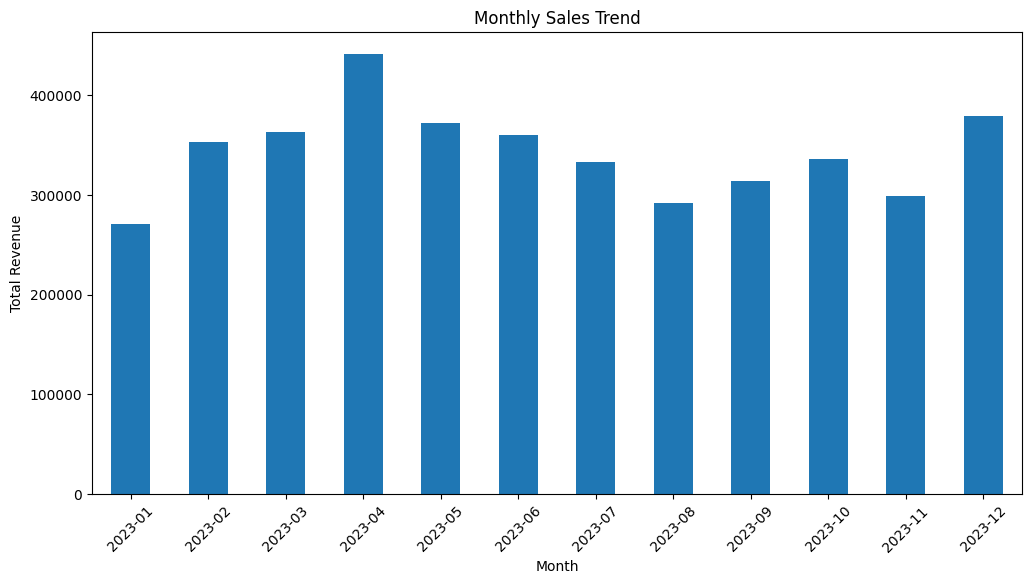

In [40]:
monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Top-selling products by revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

print("Top-selling products by revenue:")
top_products

Top-selling products by revenue:


Product
Smartphone    1135676
Headphones    1119087
Laptop        1055232
Tablet         805445
Name: Revenue, dtype: int64

In [42]:
# Sales performance by region
region_performance = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Units': 'sum',
    'Sales': 'mean'
}).sort_values('Revenue', ascending=False)

In [43]:
print("\nSales performance by region:")
region_performance


Sales performance by region:


,Revenue,Units,Sales
Region,,,
South,1096369,1287,818.518072
East,1073138,1277,824.838583
West,1020327,1358,749.826415
North,925606,1177,790.474138


### <a id='toc5_4_'></a>[Seasonal Trends Analysis](#toc0_)


Analyze how sales vary across different seasons:


In [44]:
df['Season'] = df['Date'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})

seasonal_sales = df.groupby(['Season', 'Product'])['Revenue'].sum().unstack()

print("Seasonal sales by product:")
seasonal_sales

Seasonal sales by product:


Product,Headphones,Laptop,Smartphone,Tablet
Season,,,,
Fall,286904,219284,230365,212981
Spring,304410,378595,280701,213025
Summer,242846,210869,359663,171728
Winter,284927,246484,264947,207711


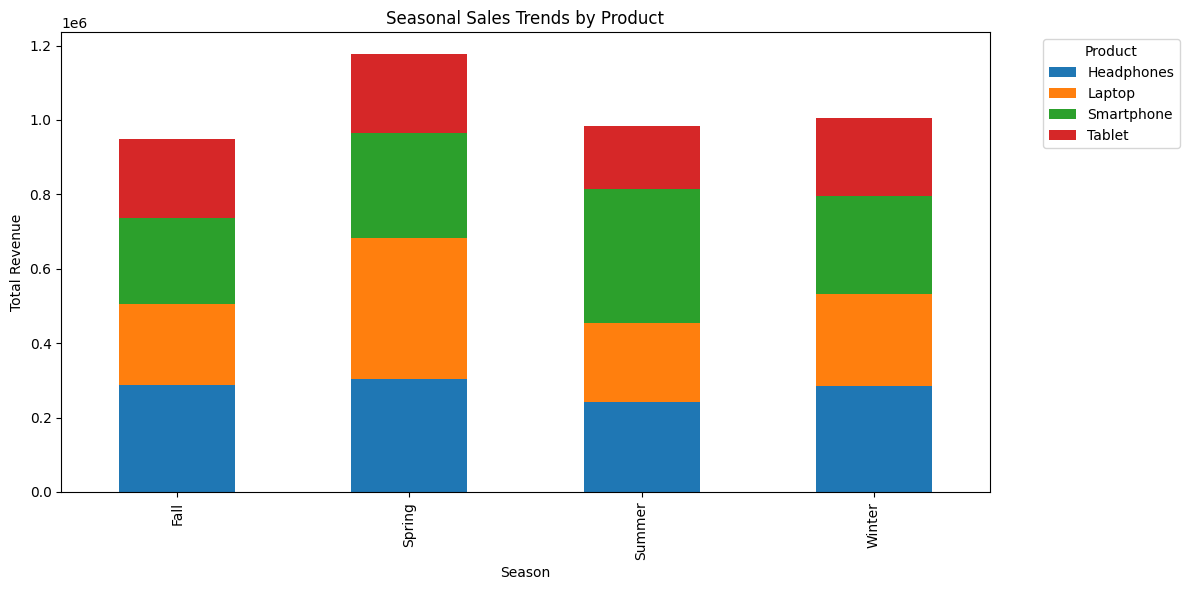

In [45]:
# Visualize seasonal trends
seasonal_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Seasonal Sales Trends by Product')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### <a id='toc5_5_'></a>[Sales Team Performance Analysis](#toc0_)


Assuming we have a 'Sales_Rep' column, let's analyze the performance of our sales team:


In [46]:
# Add a Sales_Rep column for this example
df['Sales_Rep'] = np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], size=len(df))
df

,Date,Product,Region,Sales,Units,Revenue,Revenue_Pct,Revenue_Diff_From_Mean,Sales_Rank,Cumulative_Units,Season,Sales_Rep
0,2023-01-01,Tablet,North,102,6,612,0.075983,-3377.681034,213.0,6,Winter,Bob
1,2023-01-01,Laptop,West,1051,9,9459,0.896391,5608.709434,74.0,9,Winter,David
2,2023-01-01,Laptop,North,1235,4,4940,0.468143,950.318966,50.0,13,Winter,Alice
3,2023-01-01,Laptop,East,1238,1,1238,0.117320,-2986.952756,49.0,14,Winter,Bob
4,2023-01-03,Laptop,East,194,1,194,0.018385,-4030.952756,214.0,15,Winter,Bob
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-12-30,Headphones,East,573,6,3438,0.307215,-786.952756,157.0,1373,Winter,Alice
996,2023-12-30,Smartphone,East,896,2,1792,0.157791,-2432.952756,106.0,1345,Winter,Bob
997,2023-12-30,Smartphone,West,362,3,1086,0.095626,-2764.290566,196.0,1348,Winter,Alice
998,2023-12-31,Laptop,South,283,1,283,0.026819,-4120.088353,194.0,1303,Winter,Alice


In [47]:
sales_rep_performance = df.groupby('Sales_Rep').agg({
    'Revenue': 'sum',
    'Units': 'sum',
    'Sales': 'count'
}).rename(columns={'Sales': 'Transactions'})
sales_rep_performance

,Revenue,Units,Transactions
Sales_Rep,,,
Alice,804677,978,191
Bob,904952,1120,213
Charlie,763087,961,185
David,872276,1034,208
Eva,770448,1006,203


In [48]:
sales_rep_performance['Avg_Deal_Size'] = sales_rep_performance['Revenue'] / sales_rep_performance['Transactions']
sales_rep_performance = sales_rep_performance.sort_values('Revenue', ascending=False)

print("Sales Representative Performance:")
sales_rep_performance

Sales Representative Performance:


,Revenue,Units,Transactions,Avg_Deal_Size
Sales_Rep,,,,
Bob,904952,1120,213,4248.600939
David,872276,1034,208,4193.634615
Alice,804677,978,191,4212.968586
Eva,770448,1006,203,3795.310345
Charlie,763087,961,185,4124.794595


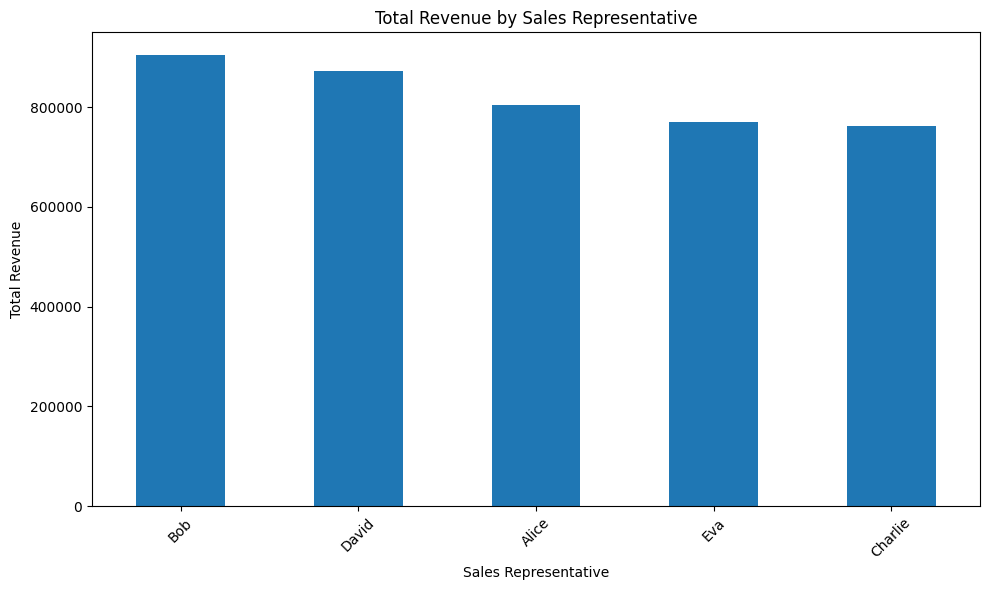

In [49]:
# Visualize sales rep performance
sales_rep_performance['Revenue'].plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue by Sales Representative')
plt.xlabel('Sales Representative')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These practical examples demonstrate how grouping and aggregating data can provide valuable insights for business decision-making. From analyzing sales trends and customer behavior to evaluating product performance and sales team effectiveness, these techniques allow you to extract meaningful patterns and information from your data.


Remember to adapt these examples to your specific dataset and business questions. The power of grouping and aggregation lies in their flexibility to answer a wide range of analytical questions across various domains.